### 二元分类介绍
| 模块           | 关键内容                                                                                               | 讲解要点                                                       |
| ------------ | -------------------------------------------------------------------------------------------------- | ---------------------------------------------------------- |
| **什么是分类？**   | 用模型回答“是 / 否”或“属于哪一类”的问题                                                                            | 结果 **$y$** 不是连续数，而是离散类别                                    |
| **示例问题**     | - 这封邮件是垃圾邮件吗？<br>- 这笔交易是欺诈吗？<br>- 这枚肿瘤是恶性的吗？                                                       | 每个问题的答案只可能是 **“是 / 否”**                                    |
| **输出标签 $y$** | 只能取 **两种值** → 称为 **二元分类**                                                                          | 通常用数字表示：<br>- **0** → False / “否”<br>- **1** → True  / “是” |
| **正负类别**     | - **正类 (positive class)**：用 **1** 表示，含义是“该现象存在”<br>- **负类 (negative class)**：用 **0** 表示，含义是“该现象缺失” | “正 / 负”与“好 / 坏”无必然对应，只代表有无                                 |
| **为何用 0/1？** | - 便于模型计算（如逻辑回归的 Sigmoid 输出介于 0–1）<br>- 损失函数、评估指标都依赖数值编码                                            |                                                            |


- 为什么线性回归模型在二元分类问题上很糟糕？

1. 线性模型不会把输出限制到 0-1
2. 分类问题需要决策边界：f(x)<0.5 -> x对应的分类是0； f(x)>=0.5 -> x对应的分类是1
3. 由于分类问题的y只有0/1， 很容易来一个新的数据后，对线性模型的参数有大调整，导致决策边界出现很大变化，导致分类的表现更差，而实际情况是这个新数据的出现不应该去改变决策边界

线性回归模型在分类问题上的糟糕表现，导致需要其他的数学模型处理分类问题



### logistic回归

需要最终输出0-1的值

**Sigmoid / Logistic 函数**

$$
g(z) = \frac{1}{1 + e^{-z}}, \qquad 0 < g(z) < 1
$$

**线性组合**

$$
z = \mathbf{w}\cdot\mathbf{x} + b
$$

**逻辑回归输出**

$$
f_{\,\mathbf{w},\,b}(\mathbf{x})
  = g\!\bigl(\mathbf{w}\cdot\mathbf{x} + b\bigr)
  = \frac{1}{1 + e^{-\bigl(\mathbf{w}\cdot\mathbf{x} + b\bigr)}}
$$

- 逻辑回归输出值的解读

| 线性组合 → Sigmoid                                                                              | 输出含义                                                                                  |
| ------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------- |
| $f_{\,\mathbf{w},\,b}(\mathbf{x}) \;=\; \frac{1}{1+e^{-(\mathbf{w}\!\cdot\!\mathbf{x}+b)}}$ | 这就是 **“预测为 1 的概率”**，记作  $\displaystyle P\bigl(y=1 \mid \mathbf{x};\mathbf{w},b\bigr)$ |

* 记号：

  * $\mathbf{x}$：输入特征向量
  * $y$：标签，0 或 1
  * $\mathbf{w}, b$：模型参数



- 概率视角

$$
  f_{\,\mathbf{w},\,b}(\mathbf{x})
  = P(y=1 \mid \mathbf{x};\mathbf{w},b)
  $$
* 由于 Sigmoid 输出范围 $0\!<\!g(z)\!<\!1$，自然可解释为概率。
* 有 概率完备性：

  $$
  P(y=0) + P(y=1) = 1
  $$

- 例子

> **例子：肿瘤直径预测恶性**
>
> * 特征 $x$：肿瘤直径（cm）
> * 标签 $y$：
>
>   * 0 ➔ 良性 (not malignant)
>   * 1 ➔ 恶性 (malignant)

若模型给出

$$
f_{\,\mathbf{w},\,b}(\mathbf{x}) = 0.7
$$

则可解读为：**该肿瘤为恶性的概率为 70%**。

* 若设阈值 0.5，则判定 $y=1$（恶性）。

### 决策边界


给定逻辑回归模型
$$
f_{\,\mathbf{w},\,b}(\mathbf{x}) = g\!\bigl(\mathbf{w}\!\cdot\!\mathbf{x}+b\bigr)
                                  = \frac{1}{1 + e^{-\bigl(\mathbf{w}\!\cdot\!\mathbf{x}+b\bigr)}} ,
$$

它可解释为

$$
f_{\,\mathbf{w},\,b}(\mathbf{x})
     \;=\;
     P\!\bigl(y = 1 \mid \mathbf{x}; \mathbf{w}, b\bigr),
$$

即“在输入 $\mathbf{x}$ 下，$y$ 为 1 的概率”。


- 0 或 1？—— 使用阈值 (threshold)

**选择阈值 0.5**：

  $$
    \hat{y} \;=\;
    \begin{cases}
      1, & f_{\,\mathbf{w},\,b}(\mathbf{x}) \,\ge\, 0.5 \\
      0, & f_{\,\mathbf{w},\,b}(\mathbf{x}) \,<\, 0.5
    \end{cases}
  $$

- 进一步推导何时 $f_{\,\mathbf{w},\,b}(\mathbf{x}) \ge 0.5$：

  $$
  \begin{aligned}
    f_{\,\mathbf{w},\,b}(\mathbf{x}) \,\ge\, 0.5
      \ &\Longleftrightarrow\;
      g(z) \,\ge\, 0.5 \\
      \ &\Longleftrightarrow\;
      z = \mathbf{w}\!\cdot\!\mathbf{x} + b \,\ge\, 0 ,
  \end{aligned}
  $$

  于是有

  $$
    \hat{y} \;=\;
    \begin{cases}
      1, & \mathbf{w}\!\cdot\!\mathbf{x} + b \ge 0 \\
      0, & \mathbf{w}\!\cdot\!\mathbf{x} + b < 0 .
    \end{cases}
  $$

- **结论**：
  决策边界由超平面 $\mathbf{w}\!\cdot\!\mathbf{x} + b = 0$ 给出；Sigmoid + 阈值 0.5 等价于判断该线性函数的符号。


- 决策边界的例子

![决策边界图](./images/监督学习-分类1.png)
![决策边界图-非线性](./images/监督学习-分类2.png)

![决策边界图-非线性2](./images/监督学习-分类3.png)

- 快速问答：假设你正在开发一款肿瘤检测算法，目的是先行筛查出可能的肿瘤并提交给专家进一步检查。那么，该把判定阈值设置为多少才合适？
1. 较高，比如阈值设置为0.9
2. 较低，比如阈值设置为0.2

### 代码绘制决策边界

In [6]:
import numpy as np
import matplotlib.pyplot as plt

* **数据集**

假设你有如下训练数据集：

* 输入变量 `X` 是一个 NumPy 数组，包含 6 条训练样本，每条样本有两个特征
* 输出变量 `y` 也是一个 NumPy 数组，同样包含 6 条样本，其取值仅为 `0` 或 `1`


In [7]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

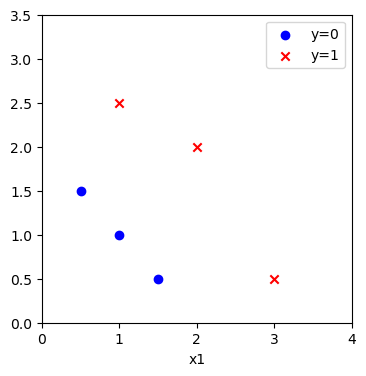

In [15]:
# 随堂练习：把X里的每个样本（x0,x1)看成坐标绘制散点图，要求样本对应的分类是0画圆，样本对应的分类是1画叉，绘图如下：
fig,ax = plt.subplots(1,1,figsize=(4,4))

# TODO: 在ax上绘图


# ------- 这里不用修改 ---------------
# 设置坐标刻度，x：0-4， y：0-3.5
ax.axis([0,4,0,3.5])
plt.show()

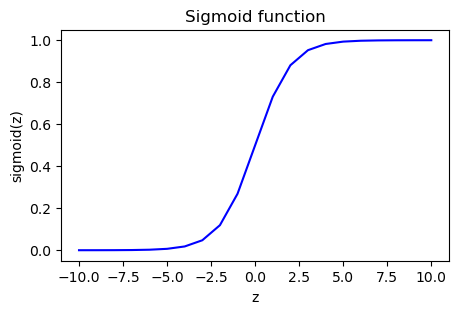

In [17]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# 在-10 到 10 画 sigmoid(z)
z = np.arange(-10,11)

fig,ax = plt.subplots(1,1,figsize=(5,3))

# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
plt.show()

* **绘制决策边界**

现在看逻辑回归模型是如何进行预测的。

* 我们的逻辑回归模型为

  $$
  f(\mathbf{x}) \;=\; g\!\bigl(-3 + x_0 + x_1\bigr)
  $$

* 根据前面的推导，当

  $$
  -3 + x_0 + x_1 \;\ge\; 0
  $$

  时，模型预测 $y = 1$。

下面用图形方式展示这一点。首先绘制方程

$$
-3 + x_0 + x_1 = 0
$$

这等价于

$$
x_1 = 3 - x_0.
$$


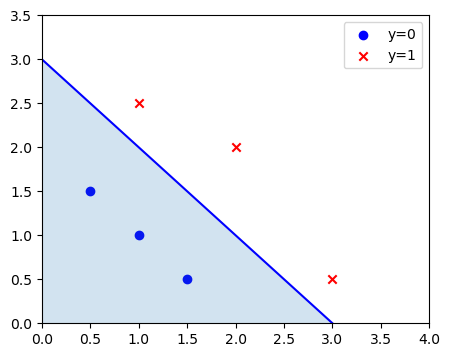

In [21]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# 随堂练习：
# 1. 把刚才 的把X里的数据看成坐标 画成根据y分类绘制的散点图的代码，定义到一个函数里 ，直接调用函数绘制数据. 函数参数接收 X,y 和 ax（子图对象）
# TODO


x0 = np.arange(0, 6)
# 2. 根据公式 x1 = 3-x0，画决策边界
# TODO
x1 = ...




# ------- 这里不用修改 ---------------
ax.axis([0, 4, 0, 3.5])
ax.fill_between(x0,x1, alpha=0.2) # 填充在线下面的区域
plt.show()

# 两个练习实现正确，会得到如下图片：